In [1]:
import sklearn

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
df = pd.read_csv('../data/recs2015_public_v4.csv')

In [4]:
df.head()

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2


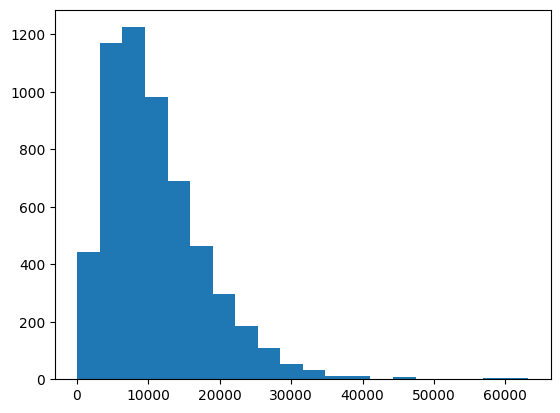

In [5]:
plt.hist(df.KWH, bins=20)
plt.show()

In [6]:
df = df[(df['KWH']>=2000) & (df['KWH']<=35000)].reset_index(drop=True)

In [7]:
df = df[df['TYPEHUQ'].isin([1,2,3])].reset_index(drop=True)

In [8]:
df.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'ZTYPEHUQ', 'CELLAR', 'ZCELLAR', 'BASEFIN',
       ...
       'ZELAMOUNT', 'NGXBTU', 'PERIODNG', 'ZNGAMOUNT', 'FOXBTU', 'PERIODFO',
       'ZFOAMOUNT', 'LPXBTU', 'PERIODLP', 'ZLPAMOUNT'],
      dtype='object', length=759)

In [9]:
cat_cols = [
    'REGIONC', 
    'DIVISION', 
    'METROMICRO', 
    'UATYP10', 
    'TYPEHUQ', 
    'BASEFIN', 
    'ATTICFIN', 
    'STORIES', 
    'SIZEOFGARAGE',
    'YEARMADERANGE',
    'BEDROOMS',
    'WALLTYPE',
    'ROOFTYPE',
    'SWIMPOOL',
    'AIRCOND',
    'COOLTYPE',
    'EQUIPM',
    'NCOMBATH',
    'TOTROOMS',
    'SMARTTHERM',
    'CLIMATE_REGION_PUB'
]

In [10]:
num_cols = [
    'TOTSQFT_EN',
    'TOTCSQFT',
    'TOTHSQFT',
    'HEATHOME',
    'USEEL',
    'ELWARM',
    'ELCOOL',
    'ELWATER',
    'ELFOOD',
    'ELOTHER'
]

In [11]:
cols = cat_cols + num_cols

In [12]:
outcome = ['KWH']

## Dataset

### Raw

In [13]:
idx = df['DOEID']
X = df[cols]
y = np.log(df[outcome].values)
y = y.reshape(len(y))

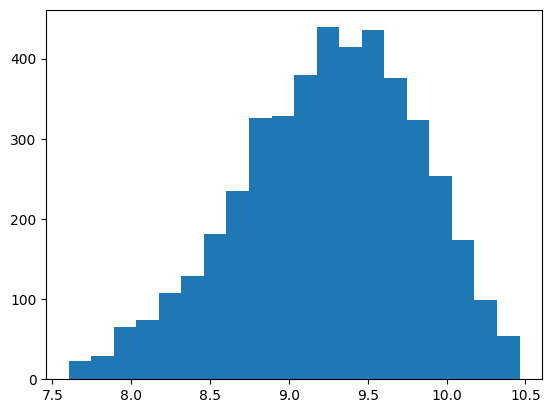

In [14]:
plt.hist(y, bins=20)
plt.show()

### Test, Train Split

In [15]:
from sklearn.model_selection import KFold

## Modeling

In [16]:
# preprocessor_pipe = [
#     (
#         'num',
#         Pipeline([
#             ('imputer', SimpleImputer(strategy='median'))
#         ])
#     ),
#     (
#         'cat',
#         Pipeline([
#             ('imputer', SimpleImputer(strategy='constant', fill_value='null_value')),
#             ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
#         ])
#     )
# ]

In [17]:
model = LinearRegression()

In [18]:
ohe = OneHotEncoder(sparse=False).fit(X[cat_cols])

In [19]:
ohe.categories_

[array([1, 2, 3, 4]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array(['METRO', 'MICRO', 'NONE'], dtype=object),
 array(['C', 'R', 'U'], dtype=object),
 array([1, 2, 3]),
 array([-2,  0,  1]),
 array([-2,  0,  1]),
 array([-2, 10, 20, 31, 32, 40]),
 array([-2,  1,  2,  3]),
 array([1, 2, 3, 4, 5, 6, 7, 8]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7, 10]),
 array([1, 2, 3, 4, 5, 6, 7, 9]),
 array([1, 2, 3, 4, 5, 7, 9]),
 array([0, 1]),
 array([0, 1]),
 array([-2,  1,  2,  3]),
 array([-2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 21]),
 array([0, 1, 2, 3, 4, 5, 6]),
 array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19]),
 array([-9, -2,  0,  1]),
 array(['Cold/Very Cold', 'Hot-Dry/Mixed-Dry', 'Hot-Humid', 'Marine',
        'Mixed-Humid'], dtype=object)]

In [20]:
ohe.feature_names_in_

array(['REGIONC', 'DIVISION', 'METROMICRO', 'UATYP10', 'TYPEHUQ',
       'BASEFIN', 'ATTICFIN', 'STORIES', 'SIZEOFGARAGE', 'YEARMADERANGE',
       'BEDROOMS', 'WALLTYPE', 'ROOFTYPE', 'SWIMPOOL', 'AIRCOND',
       'COOLTYPE', 'EQUIPM', 'NCOMBATH', 'TOTROOMS', 'SMARTTHERM',
       'CLIMATE_REGION_PUB'], dtype=object)

In [21]:
X_cat = OneHotEncoder(sparse=False).fit_transform(X[cat_cols])

In [22]:
X_num = X[num_cols]

In [23]:
# model = Pipeline([
#     ('pre', ColumnTransformer(preprocessor_pipe)),
#     ('model', final_est),
# ])

In [24]:
X_ = pd.concat([pd.DataFrame(X_cat), X_num], axis=1)

In [25]:
X_.columns = [str(i) for i in X_.columns]

Fold: 1
0.35408186674136743


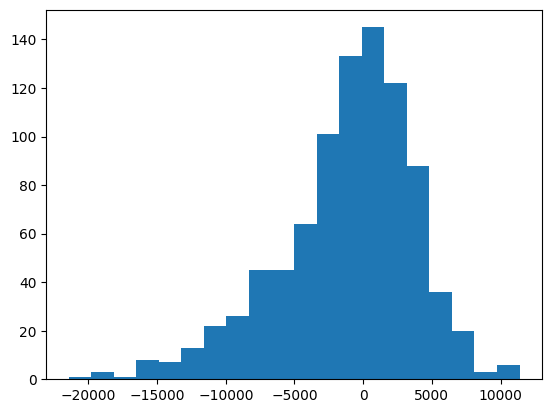

Fold: 2
0.35824351127660625


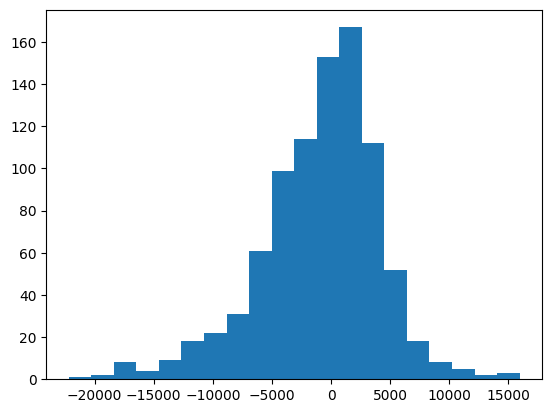

Fold: 3
0.3632657297671553


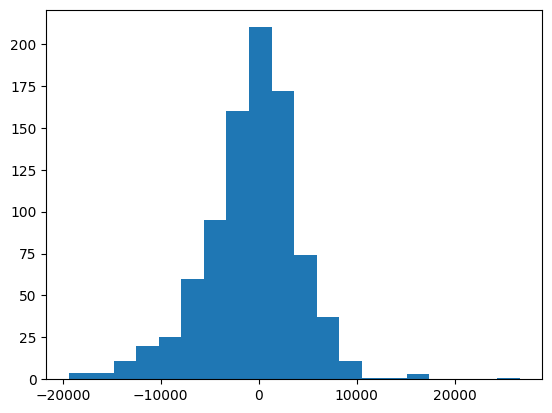

Fold: 4
0.36298022456882834


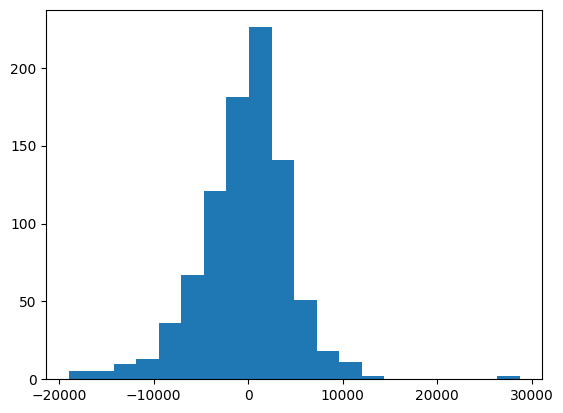

Fold: 5
0.35471823916494993


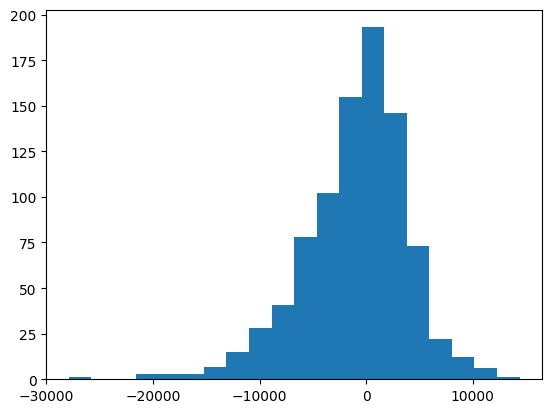

In [26]:
cv = KFold(5)
counter = 1
for train_index, test_index in cv.split(X_):
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    lm = model.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    mape = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred))
    
    print('Fold:', counter)
    counter+=1
    print(mape)
    plt.hist((np.exp(y_pred) - np.exp(y_test)).reshape(len(y_test)), bins=20)
    plt.show()

## Model Inference

In [27]:
import statsmodels.api as sm

In [28]:
lm_statsmodel = sm.OLS(y, X_).fit()

In [29]:
np.sort((lm_statsmodel.params))

array([-1.25028190e-01, -1.20424411e-01, -1.02305608e-01, -1.00749584e-01,
       -7.42083403e-02, -7.10454643e-02, -6.84056536e-02, -5.39217194e-02,
       -5.17162481e-02, -4.96478019e-02, -3.41352605e-02, -2.20930078e-02,
       -1.27272098e-02, -9.05325841e-03, -9.73995332e-07,  2.31989121e-05,
        3.00525861e-05,  4.82825029e-03,  5.50405398e-03,  5.52596919e-03,
        2.17150785e-02,  2.59395883e-02,  3.22404504e-02,  3.79919768e-02,
        4.15366870e-02,  4.25735127e-02,  4.71277948e-02,  5.29101865e-02,
        5.57194180e-02,  7.28794742e-02,  7.39311542e-02,  8.23991507e-02,
        8.27941751e-02,  8.69139514e-02,  8.86029544e-02,  9.01914590e-02,
        9.54232629e-02,  1.00018114e-01,  1.03025667e-01,  1.03801778e-01,
        1.18578394e-01,  1.22805735e-01,  1.25776070e-01,  1.28187157e-01,
        1.32082459e-01,  1.32917778e-01,  1.32980140e-01,  1.39058413e-01,
        1.39931977e-01,  1.41836739e-01,  1.44939938e-01,  1.48584102e-01,
        1.51604273e-01,  

In [30]:
lm_statsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     39.91
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        23:26:24   Log-Likelihood:                -2295.8
No. Observations:                4445   AIC:                             4802.
Df Residuals:                    4340   BIC:                             5474.
Df Model:                         104                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.2094      0.014     15.427      0.000       0.183       0.236
1              0.2574      0.011     23.280      0.000       0.236       0.279
2              0.3920      0.018     22.003      0.000       0.357       0.427
3              0.3275      0.019     16.895      0.000       0.290       0.366
4              0.0055      0.022      0.248      0.804      -0.038       0.049
5              0.2039      0.019     10.849      0.000       0.167       0.241
6              0.1000      0.015      6.866      0.000       0.071       0.129
7              0.1574      0.016      9.932      0.000       0.126       0.188
8              0.0824      0.015      5.535      0.000       0.053       0.112
9              0.1258      0.020      6.410      0.000       0.087       0.164
10             0.1839      0.020      9.358      0.000       0.145       0.222
11             0.0322      0.032      1.007      0.314      -0.031       0.095
12             0.2424      0.030      8.114      0.000       0.184       0.301
13             0.0529      0.026      2.001      0.045       0.001       0.105
14             0.3815      0.015     24.875      0.000       0.351       0.412
15             0.3879      0.017     22.881      0.000       0.355       0.421
16             0.4169      0.019     21.877      0.000       0.380       0.454
17             0.4012      0.016     24.570      0.000       0.369       0.433
18             0.4370      0.013     33.014      0.000       0.411       0.463
19             0.3482      0.014     25.616      0.000       0.322       0.375
20             0.3360      0.032     10.431      0.000       0.273       0.399
21             0.4943      0.022     22.530      0.000       0.451       0.537
22             0.3560      0.023     15.448      0.000       0.311       0.401
23             0.4247      0.015     29.233      0.000       0.396       0.453
24             0.3636      0.016     22.705      0.000       0.332       0.395
25             0.3982      0.013     30.603      0.000       0.373       0.424
26             0.3988      0.012     33.308      0.000       0.375       0.422
27             0.4172      0.012     35.045      0.000       0.394       0.440
28             0.3704      0.020     18.357      0.000       0.331       0.410
29             0.3360      0.032     10.431      0.000       0.273       0.399
30             0.2056      0.077      2.656      0.008       0.054       0.357
31             0.2037      0.077      2.635      0.008       0.052       0.355
32             0.1687      0.085      1.989      0.047       0.002       0.335
33             0.0869      0.338      0.257      0.797      -0.576       0.750
34             0.1855      0.083      2.229      0.026       0.022       0.349
35             0.2916      0.014     20.863      0.000       0.264       0.319
36